In [1]:
%matplotlib inline
from pylab import *
import cv2

In [2]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
rcParams['figure.figsize'] = 10, 10

In [4]:
from dataset import load_image

In [5]:
import torch

In [6]:
%pip install albumentations

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import albumentations

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.11 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


In [8]:
from utils import cuda

In [9]:
from generate_masks import get_model

In [10]:
from albumentations import Compose, Normalize

In [11]:
from torchvision.transforms import ToTensor

In [12]:
def img_transform(p=1):
    return Compose([
        Normalize(p=1)
    ], p=p)


In [13]:
def mask_overlay(image, mask, color=(0, 255, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0    
    img[ind] = weighted_sum[ind]    
    return img

In [14]:
model_path = 'data/models/unet11_binary_20/model_0.pt'
model = get_model(model_path, model_type='UNet11', problem_type='binary')

c:\Users\queen\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\queen\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


FileNotFoundError: [Errno 2] No such file or directory: 'data/models/unet11_binary_20/model_0.pt'

In [ ]:
img_file_name = 'data/cropped_train/instrument_dataset_1/images/frame003.jpg'
gt_file_name = 'data/cropped_train/instrument_dataset_1/binary_masks/frame003.png'

In [ ]:
image = load_image(img_file_name)
gt = cv2.imread(gt_file_name, 0) > 0

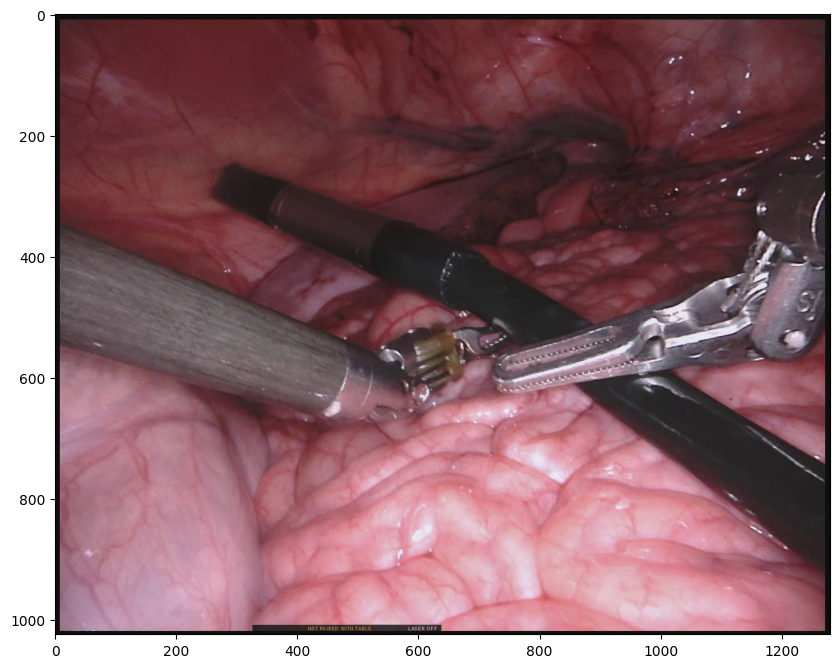

In [ ]:
imshow(image)

In [ ]:
with torch.no_grad():
    transformed_image = img_transform(p=1)(image=image)['image']
    input_image = torch.unsqueeze(ToTensor()(transformed_image), dim=0)

In [ ]:
mask = model(input_image)

In [ ]:
mask_array = mask.data[0].cpu().numpy()[0]

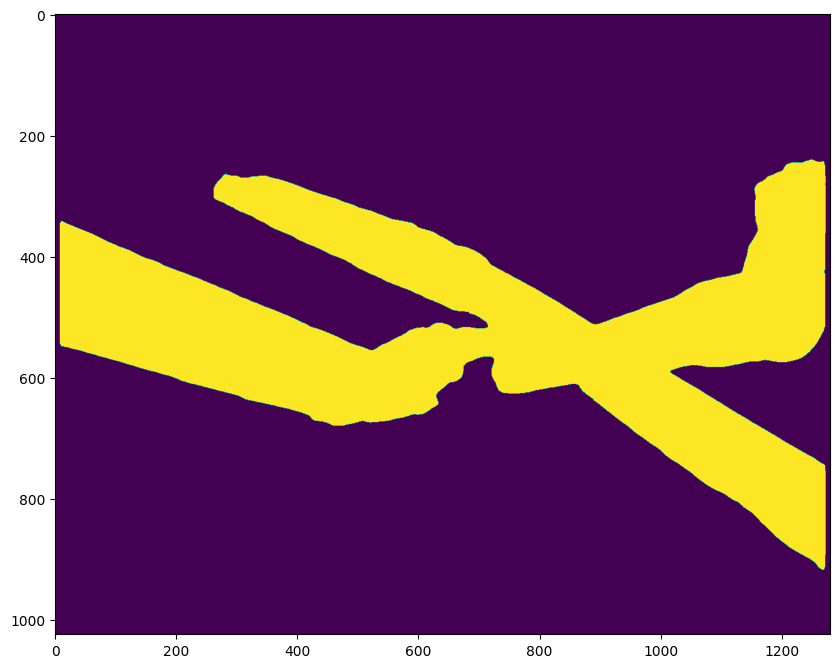

In [ ]:
imshow(mask_array > 0)

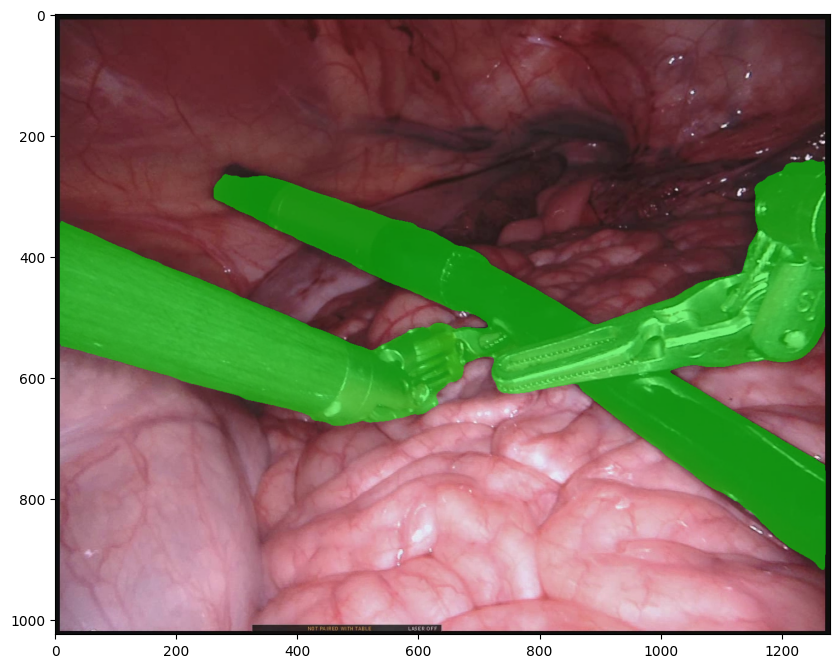

In [ ]:
imshow(mask_overlay(image, (mask_array > 0).astype(np.uint8)))